In [1]:
# Basic Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data
df = pd.read_csv("Fraud.csv")

## Basic Exploration 

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Data Cleaning:

In [7]:
# Checking duplicates
print('Duplicates : ', df.duplicated().sum())

Duplicates :  0


In [8]:
# Checking Null Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# EDA

The Dataset should have basic Rightness in balance differences before and after transaction for both the Sender and Reciever. So gonna start with exploring from there.

Segmenting datasets based on features having
right_total_bal - No wrong balance in the entire features for both Sender (before & after transaction) & Reciver (before & after transaction)

In [9]:
right_total_bal = df.loc[(df["oldbalanceOrg"] - df["amount"] == df["newbalanceOrig"]) & (df["oldbalanceDest"] + df["amount"] == df["newbalanceDest"])]

In [10]:
print("right_total_bal", right_total_bal.shape)

right_total_bal (122057, 11)


<Axes: >

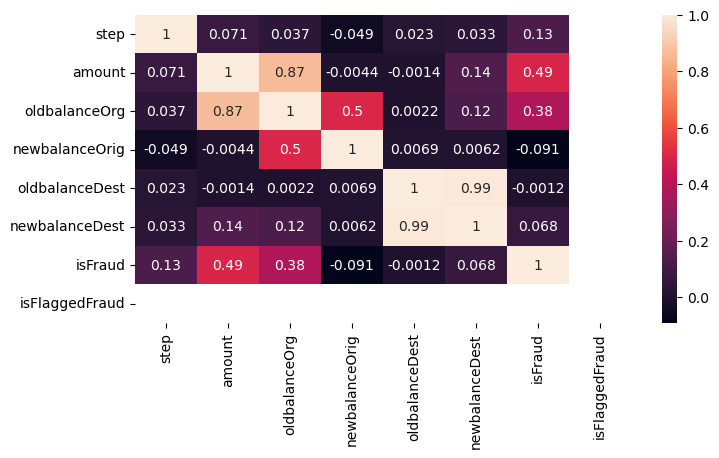

In [11]:
# visualising using correlation matrix in a new No-Balance-error features
corrmat = right_total_bal.corr()

plt.figure(figsize =(8,4))
sns.heatmap(corrmat,annot=True)

In [12]:
# 1. A seperate dataframe for the column in question
flagged_Fraud_df = df.loc[df["isFlaggedFraud"] == 1]

In [13]:
# 2. Basic Exploration
flagged_Fraud_df.shape

(16, 11)

In [14]:
flagged_Fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


<Axes: >

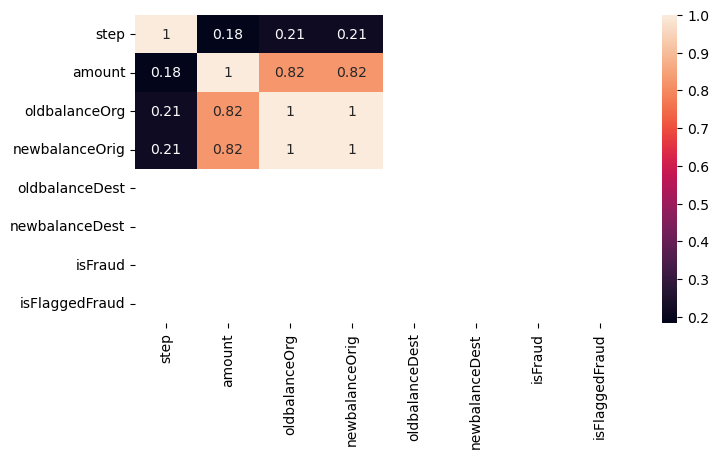

In [15]:
# 3. visualising using correlation matrix
corrmat = flagged_Fraud_df.corr()

plt.figure(figsize =(8,4))
sns.heatmap(corrmat,annot=True) #annet used to add text

In [16]:
# 1. A seperate dataframe for the column in question
# a. right_orig_bal - Right Origin (sender) side Balance before and after sending money
# b. right_dest_bal - Right Destination (Receiver) side Balance before and after receiving money
right_orig_bal = df.loc[df["oldbalanceOrg"] - df["amount"] == df["newbalanceOrig"]]
right_dest_bal = df.loc[df["oldbalanceDest"] + df["amount"] == df["newbalanceDest"]]

In [17]:
# 2. Basic Exploration
print("right_orig_bal", right_orig_bal.shape)
print("right_dest_bal", right_dest_bal.shape)

right_orig_bal (948623, 11)
right_dest_bal (1625946, 11)


<Axes: >

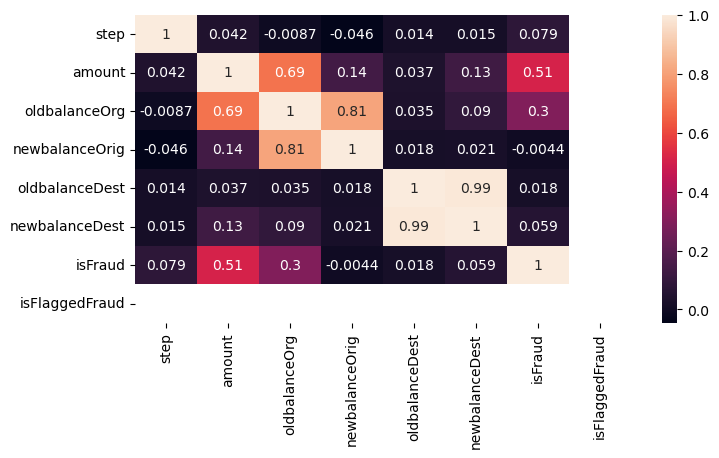

In [18]:
# 3. visualising using correlation matrix
corrmat = right_orig_bal.corr()

plt.figure(figsize =(8,4))
sns.heatmap(corrmat,annot=True) #annet used to add text

<Axes: >

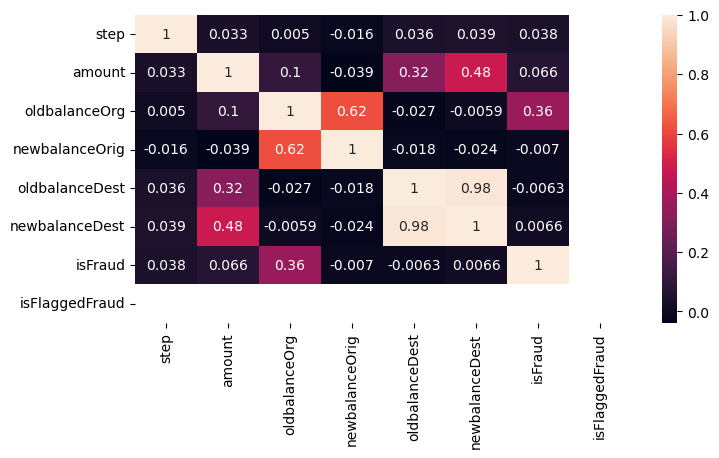

In [19]:
#correlation matrix
corrmat = right_dest_bal.corr()

plt.figure(figsize =(8,4))
sns.heatmap(corrmat,annot=True) #annet used to add text

## Categorical features

In [20]:
# visualising the original dataset and error-free datasets

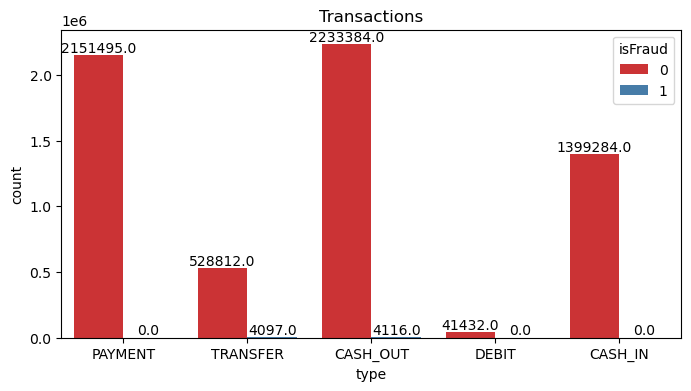

In [21]:
plt.figure(figsize=(8, 4))
cpt = sns.countplot(data=df, x="type", hue="isFraud", palette='Set1')
plt.title('Transactions')
for p in cpt.patches:
    cpt.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


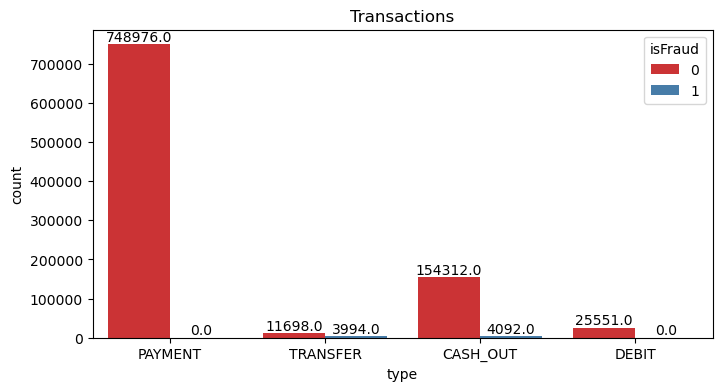

In [22]:
# right_orig_bal
plt.figure(figsize=(8, 4))
cpt = sns.countplot(data=right_orig_bal, x="type", hue="isFraud", palette='Set1')
plt.title('Transactions')
for p in cpt.patches:
    cpt.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


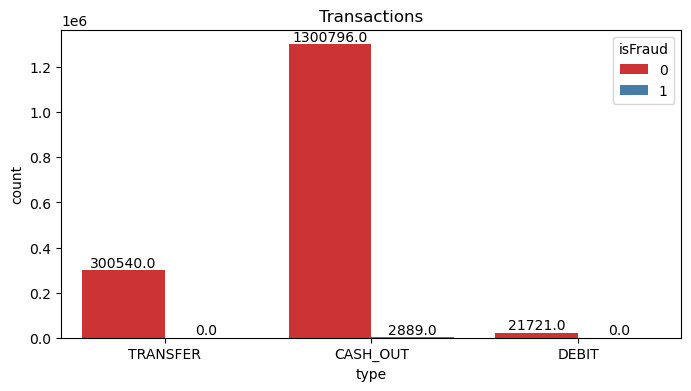

In [23]:
# right_dest_bal
plt.figure(figsize=(8, 4))
cpt = sns.countplot(data=right_dest_bal, x="type", hue="isFraud", palette='Set1')
plt.title('Transactions')
for p in cpt.patches:
    cpt.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


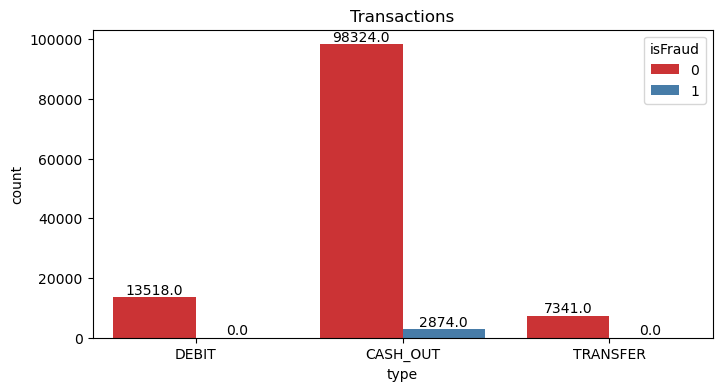

In [24]:
# right_total_bal
plt.figure(figsize=(8, 4))
cpt = sns.countplot(data=right_total_bal, x="type", hue="isFraud", palette='Set1')
plt.title('Transactions')
for p in cpt.patches:
    cpt.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


# Feature Engineering

## Dropping

In [25]:
# All the fraud trnasactions belong to Transfer or Cash-out type, so discard data corresponding to other types
df = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT']))]

In [26]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1,inplace=True)

## One-hot encoding

In [27]:
# getting one-hot encoding of the 'type' variable
df = pd.get_dummies(df,prefix=['type'])

In [28]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1


# Model Building

#### Preparing X and Y variables

In [29]:
y = df.isFraud

In [30]:
df.drop(['isFraud'], axis=1,inplace=True)

In [31]:
X = df.copy()

In [32]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1939286, 8)
X_test : (831123, 8)
y_train : (1939286,)
y_test : (831123,)


#### Create an Evaluate Function to give all metrics after model Training

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
    
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')